# Pandas: 
### - Concatenating and Joining DataFrames
### - Visualising data in DataFrames

<strong> <h2> Run The Following Code </h2> </strong>

Hit SHIFT + ENTER when your cusor is inside the cell of code.<br/>

> Data Preparation. Importing pandas

In [70]:
!python -V

Python 3.8.3


In [1]:
import pandas as pd

In [2]:
# Import the two plotting packages (don't have to use both)
## Package: Matplotlib
from matplotlib import pyplot as plt

## Package: Seaborn
import seaborn as sns

In [3]:
# These two lines are to set the size of the plot/chart
## For Matplotlib
plt.rc('figure', figsize=(16,9))
## For Seaborn
sns.set(rc= {"figure.figsize": (16, 9)})

> Open up a CSV file

In [4]:
hdb = 'data/0_raw_data/sample/years/hdb_resale_sample_raw_2012.csv'

df = pd.read_csv(hdb)

> viewing the contents of the dataset

The main dataset that we will work on is on HDB resale data.<br/>
See the description below for the fields given. <br/>
<br/>
<table>
    <tr><th>Field</th><th>Description</th></tr>
    <tr><td>Trans_YearMonth</td><td>year-month (YYYY-MM) for transaction</td></tr>
    <tr><td>town</td><td>town for the resale flat</td></tr>
    <tr><td>flat_type</td><td>flat type for the resale flat</td></tr>
    <tr><td>block</td><td>block for the resale flat</td></tr>
    <tr><td>street_name</td><td>street for the resale flat</td></tr>
    <tr><td>storey_range</td><td>storey range for the resale flat</td></tr>
    <tr><td>floor_area_sqm</td><td>floor area in square meter</td></tr>
    <tr><td>flat_model</td><td>model of resale flat</td></tr>
    <tr><td>lease_commence_date</td><td>year of lease commencement</td></tr>
    <tr><td>resale_price</td><td>price of the resale flat</td></tr>
</table>

In [5]:
df.shape #num of rows and columns 15000 rows, 10 columns

(1950, 9)

In [6]:
df.head() #first 5 rows of data

,Tranc_YearMonth,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,3 ROOM,21,BALAM RD,01 TO 05,60.0,Standard,1967,276500
1,2012-03,3 ROOM,19,BALAM RD,06 TO 10,60.3,Standard,1967,285000
2,2012-03,3 ROOM,23,BALAM RD,01 TO 05,60.3,Standard,1967,290000
3,2012-03,3 ROOM,19,BALAM RD,01 TO 05,60.3,Standard,1967,295000
4,2012-03,3 ROOM,20,BALAM RD,01 TO 05,60.3,Standard,1967,299000


## Concatenating DataFrames (with .concat)

> Concatenating DataFrames

In [7]:
import os

In [8]:
os.listdir() #prints out current working directory

['.ipynb_checkpoints', 'data', 'DC_Bootcamp_Week_8_Questions.ipynb']

In [9]:
os.listdir('data/0_raw_data/sample/years') #prints out files in specific path

['hdb_resale_sample_raw_2012.csv',
 'hdb_resale_sample_raw_2013.csv',
 'hdb_resale_sample_raw_2014.csv',
 'hdb_resale_sample_raw_2015.csv',
 'hdb_resale_sample_raw_2016.csv',
 'hdb_resale_sample_raw_2017.csv',
 'hdb_resale_sample_raw_2018.csv',
 'hdb_resale_sample_raw_2019.csv',
 'hdb_resale_sample_raw_2020.csv',
 'hdb_resale_sample_raw_2021.csv']

In [10]:

folder_path = 'data/0_raw_data/sample/years'

dfs_list = []
for filename in os.listdir(folder_path): #loop through the files and save dataframes
    df_temp = pd.read_csv(folder_path + '/' + filename)
    dfs_list.append(df_temp)
    print("appended " + filename + " with " + str(len(df_temp)) + " rows to the list of DataFrames")

appended hdb_resale_sample_raw_2012.csv with 1950 rows to the list of DataFrames
appended hdb_resale_sample_raw_2013.csv with 1491 rows to the list of DataFrames
appended hdb_resale_sample_raw_2014.csv with 1320 rows to the list of DataFrames
appended hdb_resale_sample_raw_2015.csv with 1562 rows to the list of DataFrames
appended hdb_resale_sample_raw_2016.csv with 1523 rows to the list of DataFrames
appended hdb_resale_sample_raw_2017.csv with 1641 rows to the list of DataFrames
appended hdb_resale_sample_raw_2018.csv with 1631 rows to the list of DataFrames
appended hdb_resale_sample_raw_2019.csv with 1654 rows to the list of DataFrames
appended hdb_resale_sample_raw_2020.csv with 1610 rows to the list of DataFrames
appended hdb_resale_sample_raw_2021.csv with 618 rows to the list of DataFrames


In [11]:
#concatenate dataframes
df = pd.concat(dfs_list)
#notice the index is off because it follows respective dataframes index
df

,Tranc_YearMonth,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,3 ROOM,21,BALAM RD,01 TO 05,60.0,Standard,1967,276500.0
1,2012-03,3 ROOM,19,BALAM RD,06 TO 10,60.3,Standard,1967,285000.0
2,2012-03,3 ROOM,23,BALAM RD,01 TO 05,60.3,Standard,1967,290000.0
3,2012-03,3 ROOM,19,BALAM RD,01 TO 05,60.3,Standard,1967,295000.0
4,2012-03,3 ROOM,20,BALAM RD,01 TO 05,60.3,Standard,1967,299000.0
...,...,...,...,...,...,...,...,...,...
613,2021-04,5 ROOM,230,LOR 8 TOA PAYOH,01 TO 03,119.0,Standard,1976,430000.0
614,2021-04,5 ROOM,229,LOR 8 TOA PAYOH,10 TO 12,117.0,Standard,1976,510000.0
615,2021-04,3 ROOM,6,MARSILING DR,01 TO 03,65.0,Improved,1976,268000.0
616,2021-04,3 ROOM,13,MARSILING LANE,07 TO 09,76.0,Improved,1976,240000.0


In [12]:
#concatenate dataframes
df = pd.concat(dfs_list, ignore_index=True) #concatenate dataframes
#notice the index is now correct
df

,Tranc_YearMonth,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,3 ROOM,21,BALAM RD,01 TO 05,60.0,Standard,1967,276500.0
1,2012-03,3 ROOM,19,BALAM RD,06 TO 10,60.3,Standard,1967,285000.0
2,2012-03,3 ROOM,23,BALAM RD,01 TO 05,60.3,Standard,1967,290000.0
3,2012-03,3 ROOM,19,BALAM RD,01 TO 05,60.3,Standard,1967,295000.0
4,2012-03,3 ROOM,20,BALAM RD,01 TO 05,60.3,Standard,1967,299000.0
...,...,...,...,...,...,...,...,...,...
14995,2021-04,5 ROOM,230,LOR 8 TOA PAYOH,01 TO 03,119.0,Standard,1976,430000.0
14996,2021-04,5 ROOM,229,LOR 8 TOA PAYOH,10 TO 12,117.0,Standard,1976,510000.0
14997,2021-04,3 ROOM,6,MARSILING DR,01 TO 03,65.0,Improved,1976,268000.0
14998,2021-04,3 ROOM,13,MARSILING LANE,07 TO 09,76.0,Improved,1976,240000.0


## Joining DataFrames (with .merge)

> Joining DataFrames (with an simple example)

In [13]:
df1 = pd.DataFrame({"Name": ["Ali", "Ah Ming", "Mutu"], "class": ["a", "b", "b"]})
df1

,Name,class
0,Ali,a
1,Ah Ming,b
2,Mutu,b


In [14]:
df2 = pd.DataFrame({"Name": ["Ali", "Ah Ming", "Ah Ming", "Siti"], "subject": ["eng", "eng", "math", "math"], "score": [85, 25, 76, 80]})
df2

,Name,subject,score
0,Ali,eng,85
1,Ah Ming,eng,25
2,Ah Ming,math,76
3,Siti,math,80


In [15]:
# You can experimenting with the "left", "right", "inner", "outer" on the 'how' parameter to see the impacts
df1.merge(df2, how='left', on='Name')

,Name,class,subject,score
0,Ali,a,eng,85.0
1,Ah Ming,b,eng,25.0
2,Ah Ming,b,math,76.0
3,Mutu,b,NaN,NaN


> Joining DataFrames (using HDB dataset)

In [16]:
df_mapping_streetname_to_town = pd.read_csv('data/0_raw_data/sample/hdb_resale_sample_raw_towns.csv') #towns dataframe

In [17]:
df_mapping_streetname_to_town.head()

,town,street_name
0,JURONG EAST,TEBAN GDNS RD
1,GEYLANG,BALAM RD
2,QUEENSTOWN,C'WEALTH CL
3,QUEENSTOWN,C'WEALTH DR
4,TOA PAYOH,LOR 1 TOA PAYOH


In [18]:
df_dataset = pd.merge(df, df_mapping_streetname_to_town, how='left', on='street_name') #joined dataframe

In [19]:
# To delete a variable (and erase the memory)
del df_dataset

<br/>

---

---

# Visualising Data in DataFrames

In [20]:
# Ignore the " DtypeWarning" warning
df = pd.read_csv('data/1_processed_data/hdb_resale_sample_processed.csv')

---

## Charts that doesn't need groupby
- These charts can use raw data, without aggregating the data first
- These are charts that shows entire distribution of the data.

### Histogram
Good to show distribution of data

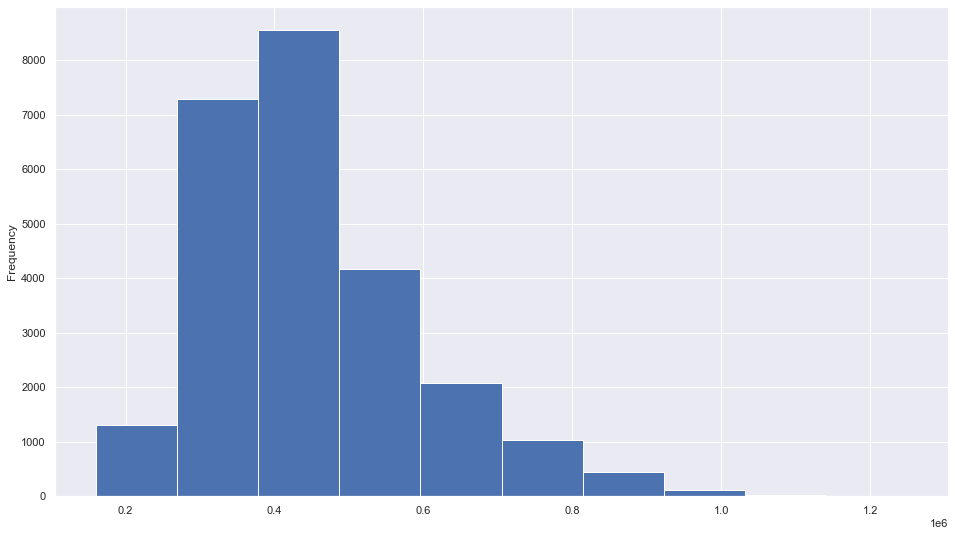

In [21]:
df['resale_price'].plot.hist()

## Scatterplot
Good to show relationships between 2 numerical fields

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


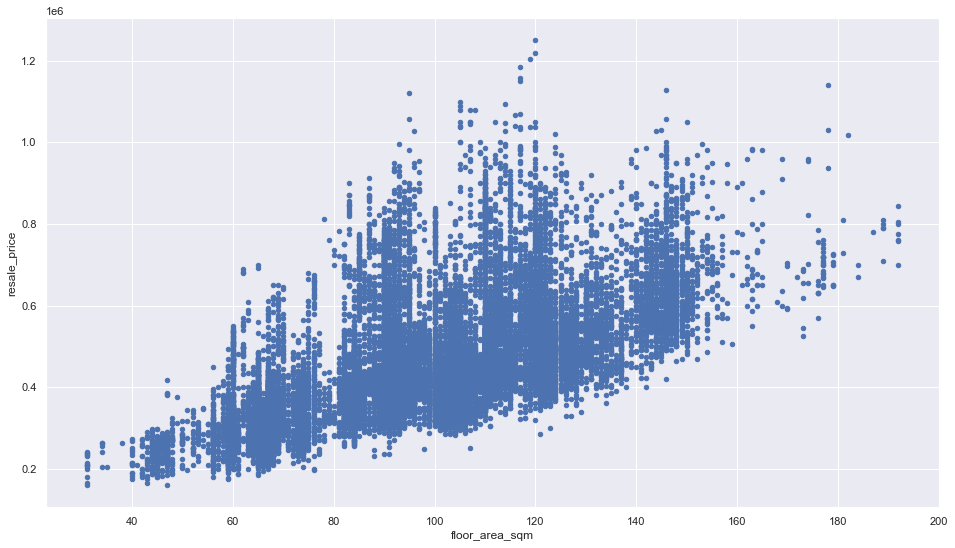

In [22]:
df.plot.scatter('floor_area_sqm', 'resale_price')

## Boxplot
Good to describe numerical fields

![Boxplot](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

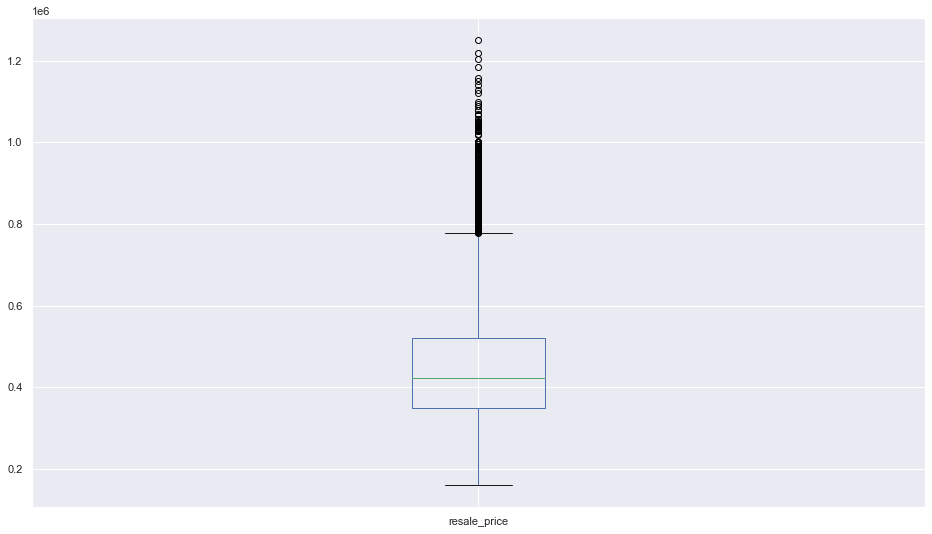

In [23]:
# The number of y-axis is the scientific notation of numbers (just like our scientific calculator)
df['resale_price'].plot.box()

---

# Charts that need groupby
These are charts that require some groupby aggregation 

### Line Chart
Good to show time trends

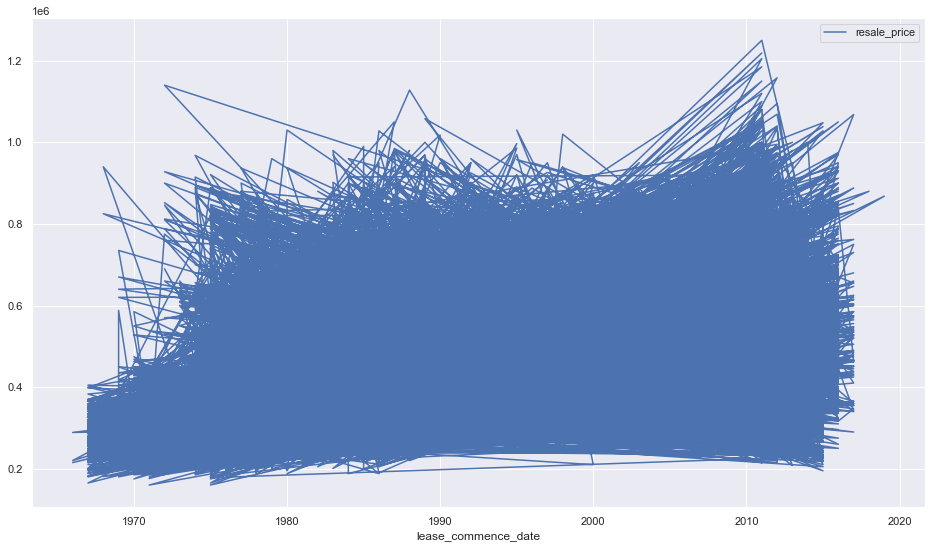

In [24]:
df.plot.line(x='lease_commence_date', y='resale_price')

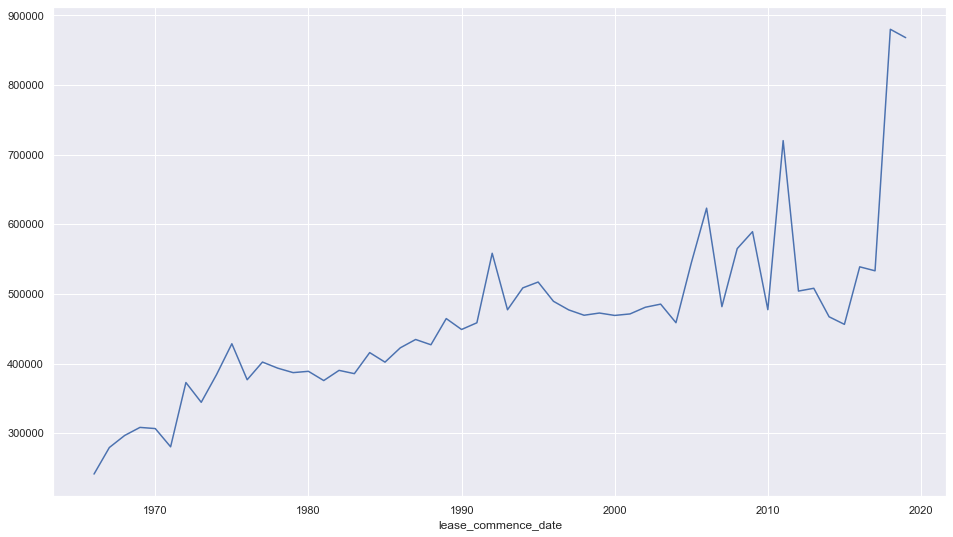

In [25]:
byyear = df.groupby('lease_commence_date')
pricebyyear = byyear['resale_price'].mean()
pricebyyear.plot.line(x='lease_commence_date', y='resale_price')

> Multiple lines

Need to create a table as below.
   <table>
    <tr><th></th><th>line1</th><th>line2</th><th>line3</th></tr>
    <tr><td><b>year1</b></td><td>line1_year1_values</td><td>line2_year1_values</td><td>line3_year1_values</td></tr>
    <tr><td><b>year2</b></td><td>line1_year2_values</td><td>line2_year2_values</td><td>line3_year2_values</td></tr>
    <tr><td><b>year3</b></td><td>line1_year3_values</td><td>line2_year3_values</td><td>line3_year3_values</td></tr>
   </table>
   
We can use the pivot function to help us.

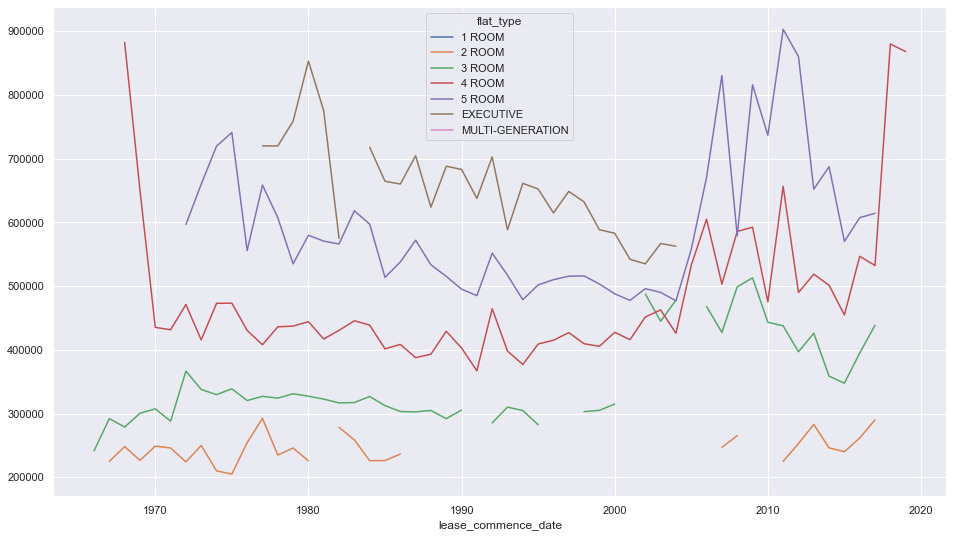

In [26]:
df.pivot_table('resale_price', 'lease_commence_date', 'flat_type', 'mean').plot.line()

In [27]:
byyearft = df.groupby(['lease_commence_date','flat_type'], as_index=False)
pricebyyearft = byyearft['resale_price'].mean()
pivot = pricebyyearft.pivot(index='lease_commence_date', columns='flat_type', values='resale_price')

## Bar
Good to compare between categories

In [28]:
df['price_per_sqm'] = df['resale_price'] / df['floor_area_sqm']

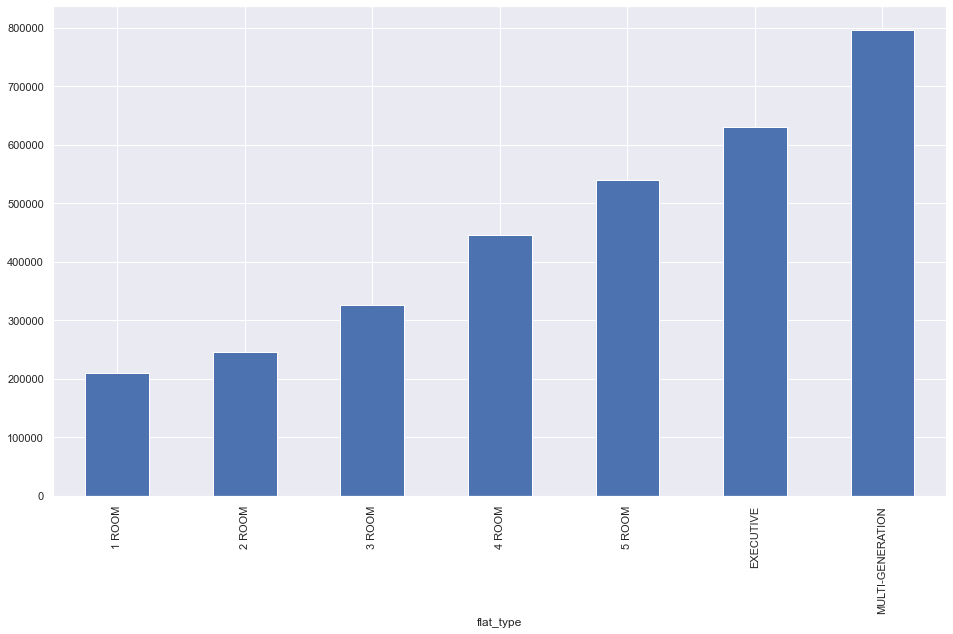

In [29]:
byflattype = df.groupby('flat_type')
pricebyflattype = byflattype[['resale_price','price_per_sqm']].mean()
pricebyflattype['resale_price'].plot.bar()

## Seaborn for Data Exploration 

- You can see seaborn is much intuitive and easier to use
- we don't have to aggregate the numbers before passing to the seaborn 
- It allows us to generate comprehensive charts that can be used to understand the data, with very little codes

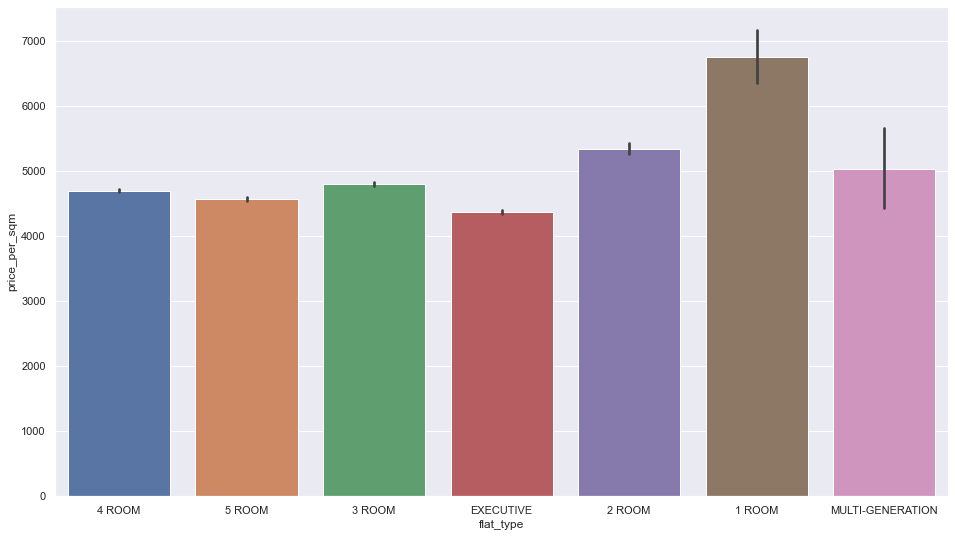

In [31]:
# Notice that no aggregation is required
sns.barplot(x='flat_type', y='price_per_sqm', data=df)

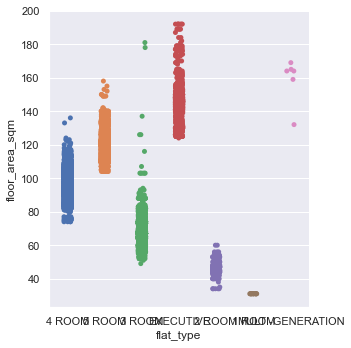

In [32]:
# Seaborn also offers charts that can efficiently visualise the individual data points
# To help us better understanding the data and potentially observe odds data points
sns.catplot(x='flat_type', y='floor_area_sqm', data=df)

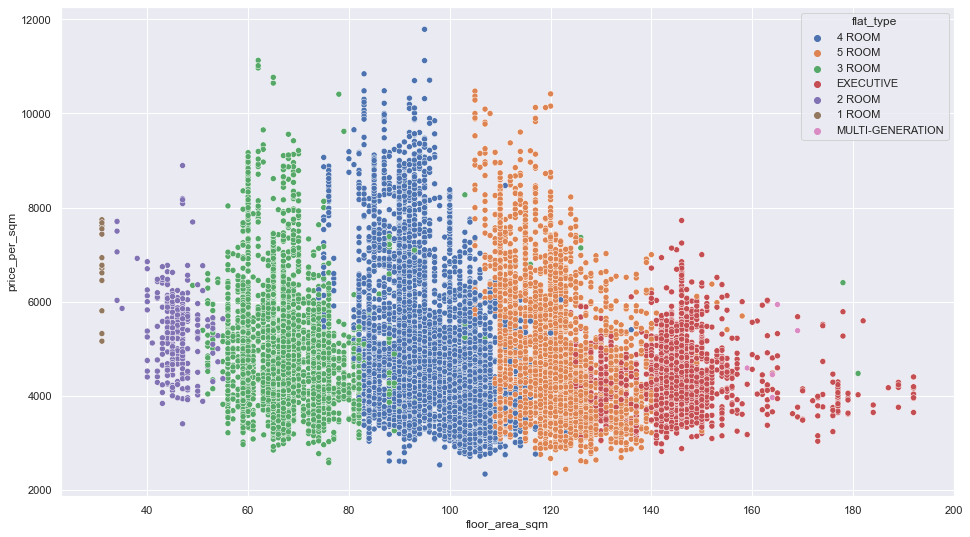

In [33]:
# Seaborn's scatterplot can be useful for exploring multi-dimensional data

sns.scatterplot(x='floor_area_sqm', y='price_per_sqm', hue='flat_type', data=df)

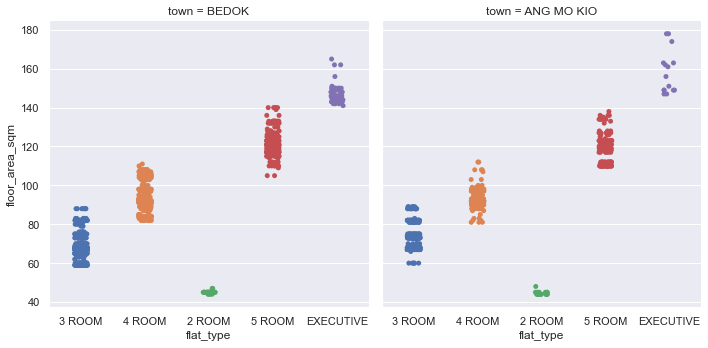

In [34]:
# Create a subset of dataset for visualisation
df_subset = df[(df['town'] == 'ANG MO KIO') | (df['town'] == 'BEDOK')]

# Seaborn can be used to quickly explore the characteristics of data
sns.catplot(x='flat_type', y='floor_area_sqm',
            col='town',
            data=df_subset)

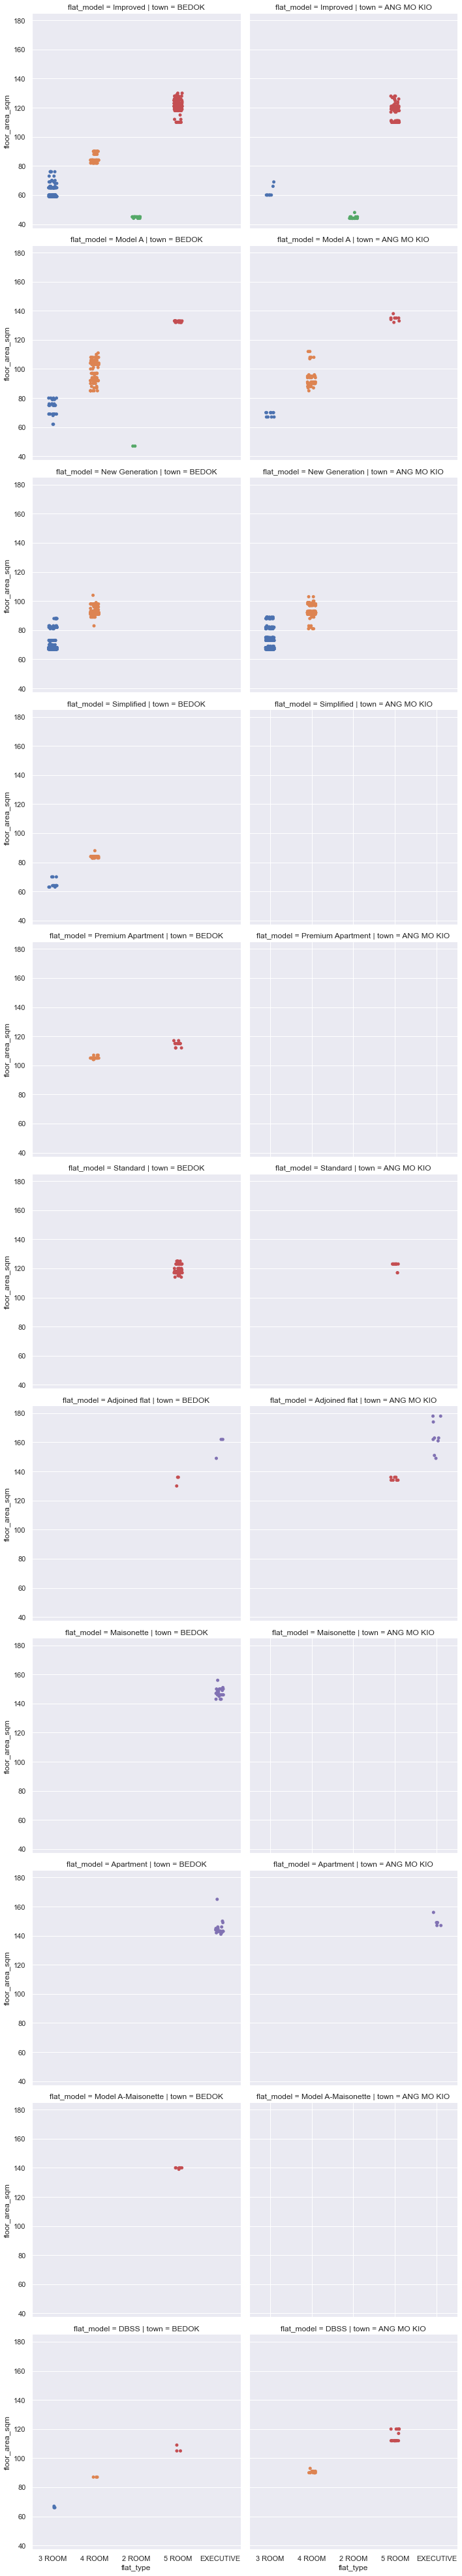

In [35]:
# You can also define another 'dimension' for the col (column) 
# This will take a bit of time to generate
sns.catplot(x='flat_type', y='floor_area_sqm',
            col='town', row='flat_model',
            data=df_subset)

# !! Your Turn !!

## Replace the code marked as <..> COMPLETELY with your own.
- The placeholder <..> is meant to be guidance for your answer.
- It should not be restricting your solutions for the questions.
- Feel free to add more lines or use less lines,
- One placeholder does not mean that you can only insert one line of codes.

# Question 1 
> Part A)

> Using os.listdir() method, list out the list of files in week 9 data > 0_raw_data > full > flat-types <br/>\
Read them as separate dataframes and save them in a list variable called **dfs_resale_list**


In [36]:
import pandas as pd
import os

In [37]:
folder_path = 'data/0_raw_data/full/hdb_resale_datasets_by_years'
print(os.listdir(folder_path))

['2012.csv', '2013.csv', '2014.csv', '2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv', '2020.csv', '2021.csv']


In [38]:
dfs_resale_list = []

# read in each csv file as a dataframe 
for filename in os.listdir(folder_path):
    df_temp = pd.read_csv(folder_path + '/' + filename)
    dfs_resale_list.append(df_temp)

> Part B): 
> - Concat the list of dataframes in **dfs_resale_list** and store dataframe in the variable **df_resale**
> - Make sure the row index is in sequential order. The last index should be **185967**.
> -  Print the **last 10 rows** of **df_resale**|

In [39]:
# Concat dataframes, resetting index to start at 1
df_resale =pd.concat(dfs_resale_list, ignore_index=True)

In [40]:
# Print last 10 rows. The last record should have index 185967
df_resale.tail(10)

,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_midpoint,address,Tranc_Year,Tranc_Month,flat_type_model
185958,2021-04,YISHUN,5 ROOM,820,YISHUN ST 81,04 TO 06,122.0,Improved,1988,525000.0,5,"820, YISHUN ST 81",2021,4,5 ROOM Improved
185959,2021-04,YISHUN,EXECUTIVE,326,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,650000.0,11,"326, YISHUN RING RD",2021,4,EXECUTIVE Maisonette
185960,2021-04,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,645000.0,5,"360, YISHUN RING RD",2021,4,EXECUTIVE Maisonette
185961,2021-04,YISHUN,EXECUTIVE,326,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,585000.0,11,"326, YISHUN RING RD",2021,4,EXECUTIVE Maisonette
185962,2021-04,YISHUN,EXECUTIVE,355,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,675000.0,11,"355, YISHUN RING RD",2021,4,EXECUTIVE Maisonette
185963,2021-04,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,625000.0,5,"277, YISHUN ST 22",2021,4,EXECUTIVE Maisonette
185964,2021-04,YISHUN,EXECUTIVE,877,YISHUN ST 81,10 TO 12,142.0,Apartment,1987,728000.0,11,"877, YISHUN ST 81",2021,4,EXECUTIVE Apartment
185965,2021-04,YISHUN,4 ROOM,506C,YISHUN AVE 4,07 TO 09,93.0,Model A,2018,460888.0,8,"506C, YISHUN AVE 4",2021,4,4 ROOM Model A
185966,2021-04,YISHUN,5 ROOM,511B,YISHUN ST 51,13 TO 15,113.0,Improved,2017,600000.0,14,"511B, YISHUN ST 51",2021,4,5 ROOM Improved
185967,2021-04,YISHUN,5 ROOM,511A,YISHUN ST 51,07 TO 09,113.0,Improved,2017,575000.0,8,"511A, YISHUN ST 51",2021,4,5 ROOM Improved


# Question 2

> Part A): Create a new column **floor_area_sqft**, to store the floor area in squared feet\
> 💡Hint: 1 squared meter = 10.764 squared foot

In [41]:
df_resale['floor_area_sqft'] =df_resale['floor_area_sqm']/10.764

2) Create a new column **price_per_sqft**, which is the price per squared foot of the particular resale unit

In [42]:
df_resale['price_per_sqft'] =df_resale['resale_price']/df_resale['floor_area_sqm']

3) Create a new column **hdb_age**, which is calculated based on current year minus the **lease_commence_date**

In [43]:
current_year = 2022
df_resale['hdb_age'] = 2022- df_resale['lease_commence_date']

# Question 3
> - Read **"flat_info_by_address.csv"** in the *data > 0_raw_data > full* into a dataframe and store in a variable **df_flat_info**
> - Print out the top 5 rows from **df_flat_info** 
> - Find the common column between **df_resale** and **df_flat_info**
> - Join the 2 dataFrames (**df_resale** and **df_flat_info**) together using left join and name the final dataframe **df**

In [44]:
df_flat_info = pd.read_csv('data/0_raw_data/full/flat_info_by_address.csv')

In [45]:
df_flat_info.head()

,address,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,...,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls
0,"174, ANG MO KIO AVE 4",11,1980,Y,N,N,N,N,198,0,...,993.314111,NaN,1.0,2.0,188.702345,1.0,4.0,8.0,40,84
1,"541, ANG MO KIO AVE 10",8,1979,Y,N,N,N,N,191,0,...,939.807674,NaN,1.0,3.0,187.273600,1.0,2.0,11.0,50,100
2,"163, ANG MO KIO AVE 4",4,1981,Y,Y,N,N,N,84,0,...,885.863729,NaN,1.0,2.0,165.991020,1.0,5.0,8.0,40,84
3,"446, ANG MO KIO AVE 10",4,1979,Y,Y,N,N,N,23,0,...,786.447876,NaN,1.0,3.0,134.216983,1.0,4.0,10.0,39,113
4,"557, ANG MO KIO AVE 10",13,1979,Y,N,N,N,N,187,0,...,1059.577046,NaN,NaN,3.0,385.235689,2.0,2.0,7.0,50,100


In [46]:
df_resale.head()

,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_midpoint,address,Tranc_Year,Tranc_Month,flat_type_model,floor_area_sqft,price_per_sqft,hdb_age
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,8,"172, ANG MO KIO AVE 4",2012,3,2 ROOM Improved,4.180602,5555.555556,36
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,3,"510, ANG MO KIO AVE 8",2012,3,2 ROOM Improved,4.087700,6022.727273,42
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,8,"610, ANG MO KIO AVE 4",2012,3,3 ROOM New Generation,6.317354,4632.352941,42
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,3,"474, ANG MO KIO AVE 10",2012,3,3 ROOM New Generation,6.224452,4776.119403,38
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,8,"604, ANG MO KIO AVE 5",2012,3,3 ROOM New Generation,6.224452,4791.044776,42


In [47]:
df = pd.merge(left=df_resale, right=df_flat_info, how="left", on="address")

df.shape

(185968, 52)

# Question 4
> Part A):
> - Plot a chart to best show distribution of **floor_area_sqm**
> - You can use any methods or packages

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# These two lines are to set the size of the plot/chart
## For Matplotlib
plt.rc('figure', figsize=(16,9))

## For Seaborn
sns.set(rc= {"figure.figsize": (16, 9)})

sns.set_style('white')
sns.set_palette('colorblind')

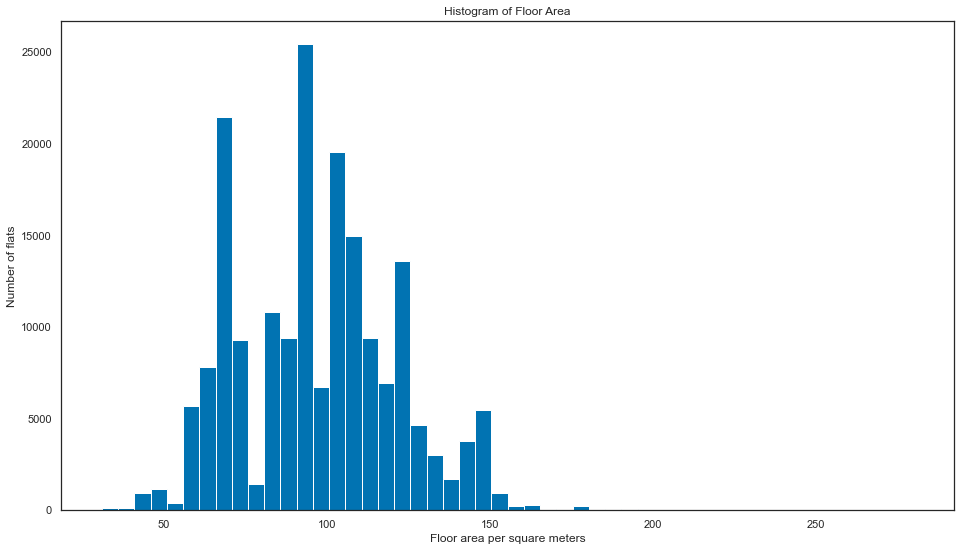

In [49]:
df['floor_area_sqm'].plot.hist(bins =50)

plt.xlabel('Floor area per square meters')
plt.ylabel('Number of flats')
plt.title('Histogram of Floor Area')
plt.show()

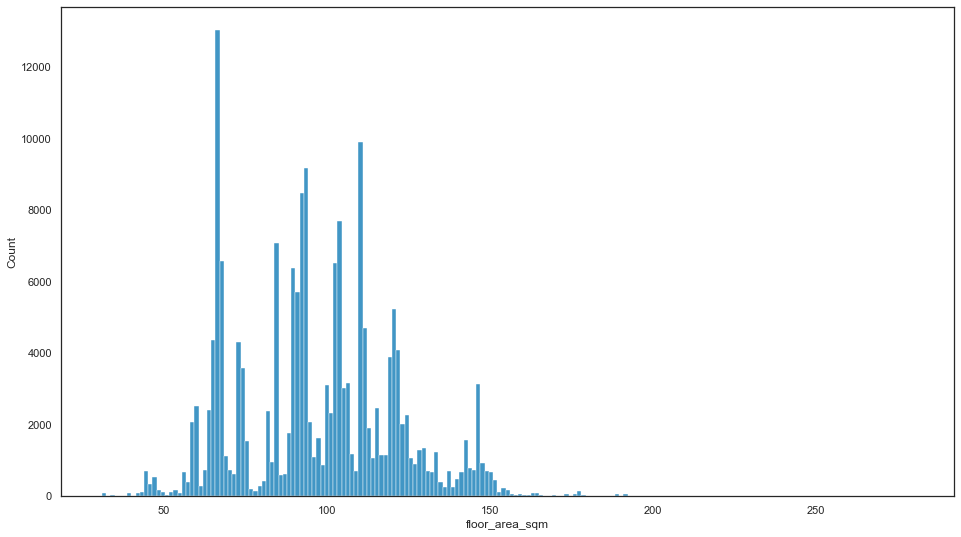

In [50]:
sns.histplot(df['floor_area_sqm'])


> Part B):
> - Explore the relationship between the **storey_midpoint** and the **price_per_sqft** of the resale units

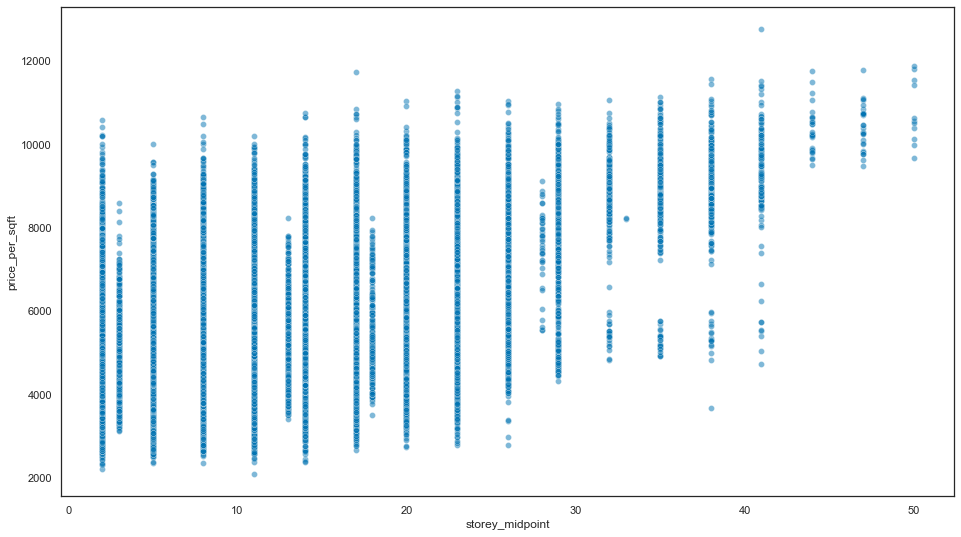

In [51]:
# Seaborn's scatterplot

sns.scatterplot(x='storey_midpoint', y='price_per_sqft',data=df, alpha=0.5)

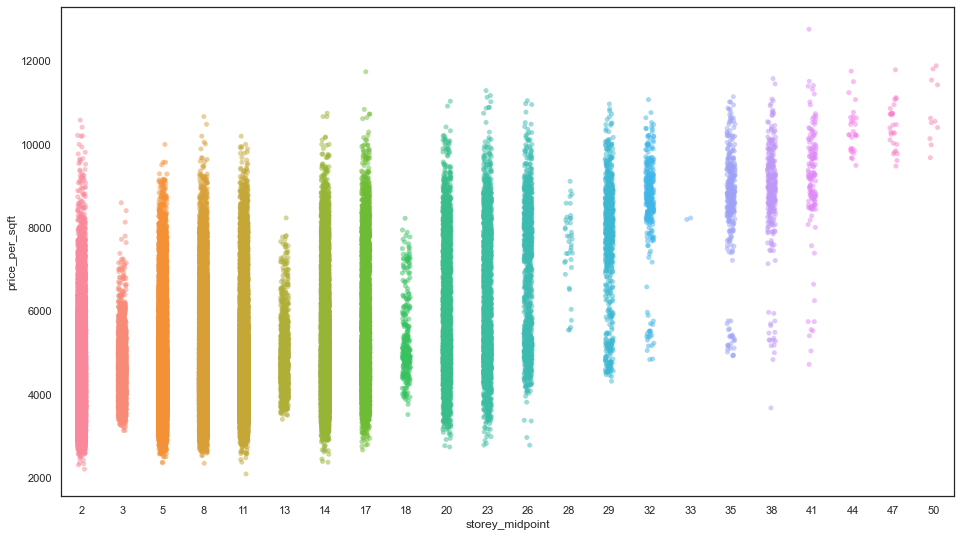

In [52]:
# Seaborn's scatterplot

sns.stripplot(x='storey_midpoint', y='price_per_sqft',data=df, alpha=0.5)

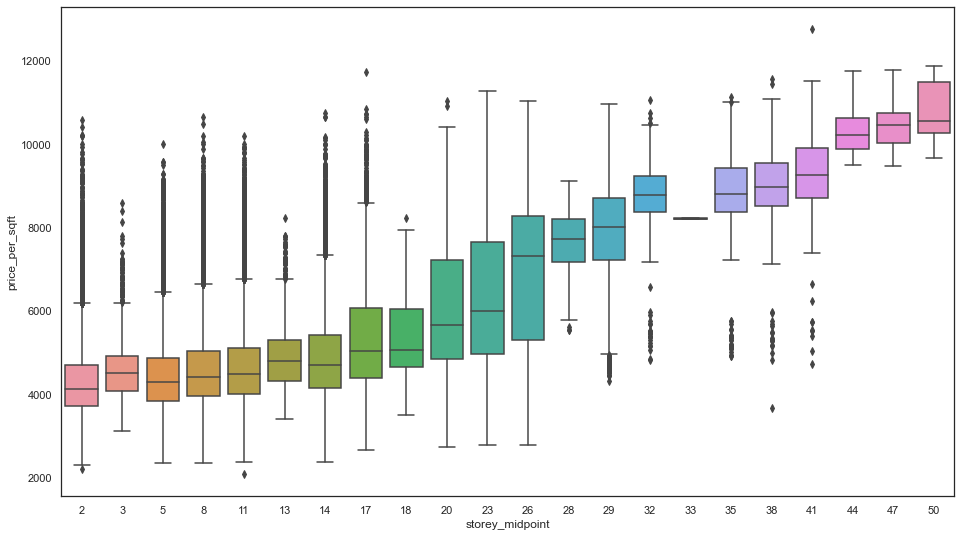

In [53]:
# Seaborn's boxplot

sns.boxplot(x='storey_midpoint', y='price_per_sqft',data=df)

> Part C):
> - Create a new chart, by adding another field (i.e. dimension) to make further refinement to depict the relationship between the **storey_midpoint** and the **price_per_sqft**

In [54]:
df['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION', '1 ROOM'], dtype=object)

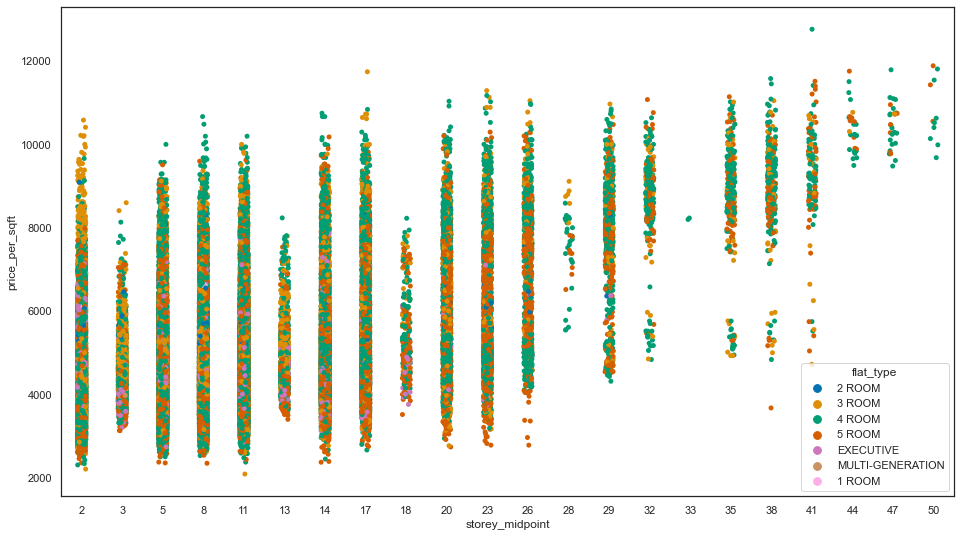

In [55]:
# Seaborn's scatterplot

sns.stripplot(x='storey_midpoint', y='price_per_sqft',data=df, hue='flat_type')

# Question 5

> - Plot a chart to depict the trend lines of price_per_sqft for the different towns

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185968 entries, 0 to 185967
Data columns (total 52 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Tranc_YearMonth          185968 non-null  object 
 1   town                     185968 non-null  object 
 2   flat_type                185968 non-null  object 
 3   block                    185968 non-null  object 
 4   street_name              185968 non-null  object 
 5   storey_range             185968 non-null  object 
 6   floor_area_sqm           185968 non-null  float64
 7   flat_model               185968 non-null  object 
 8   lease_commence_date      185968 non-null  int64  
 9   resale_price             185968 non-null  float64
 10  storey_midpoint          185968 non-null  int64  
 11  address                  185968 non-null  object 
 12  Tranc_Year               185968 non-null  int64  
 13  Tranc_Month              185968 non-null  int64  
 14  flat

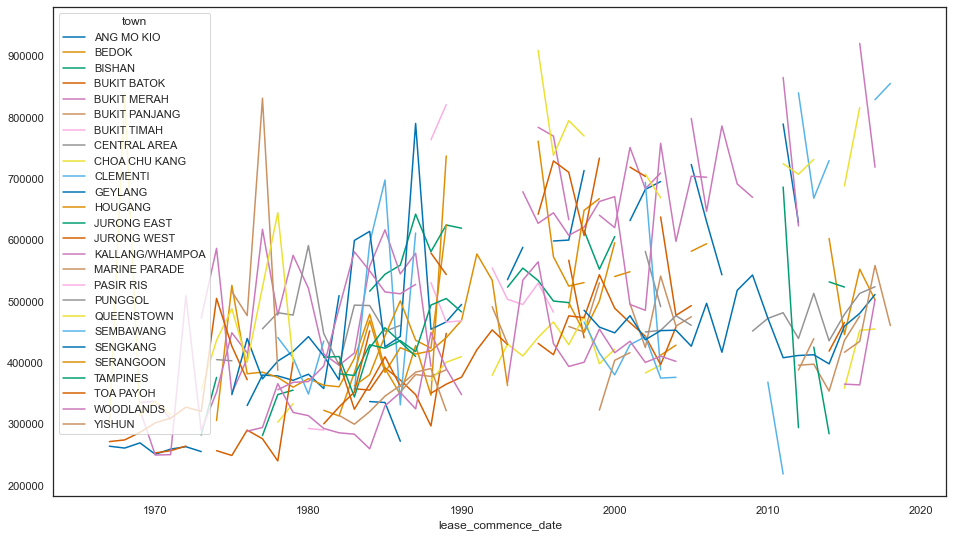

In [57]:
df.pivot_table('resale_price', 'lease_commence_date', 'town', 'mean').plot.line()

# Question 7*

>Calculate the a column **percentage_difference_from_average**, which is the percentage difference of the unit's resale price over the average resale price of the same flat_type in the same town. </br>

>> For example, the average for "3 ROOM" flat type in ANG MO KIO is \\$324,380. </br>
For a particular HDB unit with resale price of $410,000, the percentage difference is .264, which means this particular unit is 26.4% more expensive than the average resale price of the same flat_type in the same town.

### finding mean price for each town and flat_type

In [58]:
# Avg resale price by town and flat type
df_temp = df.groupby(['town', 'flat_type'], as_index=False)['resale_price'].mean()


In [59]:
df_temp.rename(columns={'resale_price':'avg_resale_price'}, inplace=True)

In [60]:
df_temp

,town,flat_type,avg_resale_price
0,ANG MO KIO,2 ROOM,242418.615385
1,ANG MO KIO,3 ROOM,324380.775252
2,ANG MO KIO,4 ROOM,477254.230904
3,ANG MO KIO,5 ROOM,673624.661947
4,ANG MO KIO,EXECUTIVE,808776.633663
...,...,...,...
123,YISHUN,3 ROOM,297048.345005
124,YISHUN,4 ROOM,372609.786019
125,YISHUN,5 ROOM,480382.411392
126,YISHUN,EXECUTIVE,593859.443730


In [61]:
df = df.merge(df_temp, how="left", on=["town", "flat_type"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185968 entries, 0 to 185967
Data columns (total 53 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Tranc_YearMonth          185968 non-null  object 
 1   town                     185968 non-null  object 
 2   flat_type                185968 non-null  object 
 3   block                    185968 non-null  object 
 4   street_name              185968 non-null  object 
 5   storey_range             185968 non-null  object 
 6   floor_area_sqm           185968 non-null  float64
 7   flat_model               185968 non-null  object 
 8   lease_commence_date      185968 non-null  int64  
 9   resale_price             185968 non-null  float64
 10  storey_midpoint          185968 non-null  int64  
 11  address                  185968 non-null  object 
 12  Tranc_Year               185968 non-null  int64  
 13  Tranc_Month              185968 non-null  int64  
 14  flat

In [62]:
df['percent_difference_from_average'] = (df['resale_price'] -df['avg_resale_price']) /df['avg_resale_price'] *100

In [69]:
# Verify answer for AMK 3 ROOM percent_diff_from_avg_price is 26.4%
df[(df['town']=="ANG MO KIO") & (df['flat_type']=="3 ROOM") & (df['resale_price']==410000)]['percent_difference_from_average']

2420      26.394667
6899      26.394667
8886      26.394667
8887      26.394667
11074     26.394667
13142     26.394667
14887     26.394667
22555     26.394667
22556     26.394667
23865     26.394667
23866     26.394667
23867     26.394667
23868     26.394667
25574     26.394667
27175     26.394667
28490     26.394667
29963     26.394667
32528     26.394667
33912     26.394667
39652     26.394667
41206     26.394667
42645     26.394667
48022     26.394667
52230     26.394667
53493     26.394667
63887     26.394667
117631    26.394667
151810    26.394667
151811    26.394667
Name: percent_difference_from_average, dtype: float64

# Question 8 
1) Save the fullhdbdf in Processed Data folder as <b>hdb_resale_full_processed.csv</b> <br/>

In [64]:
df.to_csv('data/1_processed_data/hdb_resale_full_processed.csv')